In [1]:
import numpy as np

In this chapter we will look into the very basic knowledge you must have to understnad the deep learning. In addition to the explanations and general notation, we will go through basics of programmatic use of the linear algebra using `numpy`.

# 1. Scalars, Vectors, Matrices, and Tensors

## Scalars

Just a single number. This is usually denoted as a lower-case variable:

$$
\begin{align}
s &\in \mathbb{R} \\
n &\in \mathbb{N}^+ \\
x &\leftarrow 42 \\
y &= -24
\end{align}
$$

In [2]:
# Scalars
s = -3.14
n = 314
x = 42
y = -24

## Vectors

Vectors represent an array of numbers either in a row or a column.
To represent a vector in text we interchangeably use **bold** text (${\bf x}$), overbar ($\bar{x}$), or simply as just a variable ($x$) -- if the context is clearly talking about the vectors.
Individual elements in a vector can be referred to by an index, usually denoted by a lower-case letter.

Because vectors usually have a 1D length $n$, to denote the number set of a vector we write
$$
{\bf x} \in \mathbb{R}^{n}
$$

Column vector of size $n$:
$$
{\bf x} =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

Row vector of size $n$:
$$
{\bf x} =
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
$$

Notice that we refer to the individual elements using $x_i$ notation. You can also refer to a subset of elements using a list / set of elements:

$$
\begin{align}
&S = \{1, 2, 3\} \\
&{\bf x}_S \leftarrow \text{Subset of x}
\end{align}
$$

**Note:** Following mathematical notation, we will use negative indexing when referring "exclusion" of the element. This is unline in Python, where negative indexing refers to the reversed indexing (from the end).

$$
\begin{align}
x_{-1} &\leftarrow \text{All elements in x, except index 1} \\
x_{-S} &\leftarrow \text{All elements in x, except the index subset }S \\
\end{align}
$$

In [3]:
# Vectors
row_vector = np.array([1, 2, -1, -2, 4, 3, 10])
column_vector = np.array([
    [1],
    [2],
    [-1],
    [-2],
    [4],
    [3],
    [10]
])

row_vector[2]        # The third element in the row vector
column_vector[2, 0]  # The third element in the column vector

row_vector[-1]       # The first element from the end of the row vector

10

## Matrices

Matrix is a 2D representation of the data.
We will usually use capital letters to represent a matrix ($A$).
Matrices have 2 dimensions $m$ and $n$ that represent rows and columns (height and width).
Thus we say

$$
A \in \mathbb{R}^{m\times n}
$$

Because individual elements of a matrix are referred to as $a_{i,j}$ (or $A_{i,j}$), we can write a matrix of size $m$ by $n$:

$$
A = 
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{bmatrix}
$$

We can also refer to the individual rows using $A_{i,:}$ and columns $A_{:,j}$.

Sometimes we need to split a matrix into submatrices, in which case, we can have the following notation:

$$
A = 
\begin{bmatrix}
A_{1,1} & A_{1, 2} \\
A_{2,1} & A_{2, 2}
\end{bmatrix}
$$

which shows matrix $A$ that consists of four submatrices $A_{1, 1}, \dots, A_{2, 2}$

In [4]:
A = np.array([
    [1, 2, 3, -1],
    [4, 10, 5, 6],
    [3, 4, 3, 4]
])

## Tensors

Tensor is a generalized version of a number container in mathematics.
It is "like" a matrix, but can have an arbitrary number of dimensions (axes).
In fact, here is a relationship between a tensor and other data types we described earlier:

- 0D Tensor = Scalar
- 1D Tensor = Vector / Array: Shapes can be written as $(1\times m)$ for row-vector or $(m \times 1)$ for column vector
- 2D Tensor = Matrix

Although we will use the matrix notation for tensors, in the places where distinction between matrices and tensors is important we will use **bold-face** to show the tensors

$$
\begin{align}
X & \leftarrow\text{This is a matrix} \\
{\bf X} & \leftarrow\text{This is a tensor}
\end{align}
$$

However, most of the time it won't matter if the discussion is about matrices or tensors...

### Transpose

The first operation we will cover is the **transpose**. Formally, this operation is only allowed for a matrix (2D tensor). Transpose is denoted using a capital $T$ superscript, and is defined as follows:

$$
\left(A^T\right)_{i, j} = A_{j, i}
$$

which can be interpreted as the rows and columns are flipped. For example:

$$
\begin{align}
A &=
\begin{bmatrix}
1 & 2 \\
5 & 4 \\
3 & 6
\end{bmatrix}
\\
\Rightarrow
A^T &=
\begin{bmatrix}
1 & 5 & 3 \\
2 & 4 & 6
\end{bmatrix}
\end{align}
$$

**Note 1:** Transposing a transposed matrix returns us back to the original matrix: $\left(A^T\right)^T = A$.

We mentioned that formally transpose should be applied to a matrix only. However, in this setting we will extend the definition as "transpose swaps two last axes, unless specified otherwise".
That means that a tensor of shape $(m_1 \times m_2 \times \dots \times m_{n-2} \times m_{n-1} \times m_n)$ will be transposed into $(m_1 \times m_2 \times \dots \times m_{n-2} \times m_n \times m_{n-1})$.

**Note 2:** Transposing a row vector converts it to a column vector and vice-versa

This is not a formal way of transposition, but very useful in the context of deep learning.
By default we will imply that the last two axes are being transposed.
However, when needed we will explicitly specify the axes of transposition using a superscript $T_{k, l}$ to denote transposition of axes $k$ and $l$ (i.e. ${\bf A}^{T_{1, 2}}$).

In [5]:
import torch
x = torch.ones(2, 3, 4)
x.transpose(0, 2).shape

torch.Size([4, 3, 2])

# 2. Multiplying Tensors

**_Don't confuse it with the "tensor product"_**

Multiplying tensors is also a construct that is not formally defined.
We will extend the matrix multiplication to the tensors.

**Matrix multiplication** is formally defined as

$$
\begin{align}
C &= AB \\
C_{i,j} &= \sum_kA_{i,k}B_{k,j}, & \forall{i, j}
\end{align}
$$

For example

$$
\begin{align}
C &=
\begin{bmatrix}
1 & 5 & 3 \\
2 & 4 & 6
\end{bmatrix}
\begin{bmatrix}
3 & 5 \\
7 & 11 \\
13 & 17
\end{bmatrix} \\
&=
\begin{bmatrix}
1 \cdot 3 + 5 \cdot 7 + 3 \cdot 13 & 1 \cdot 5 + 5 \cdot 11 + 3 \cdot 17 \\
2 \cdot 3 + 4 \cdot 7 + 6 \cdot 13 & 2 \cdot 5 + 4 \cdot 11 + 6 \cdot 17
\end{bmatrix} \\
&=
\begin{bmatrix}
77 & 111 \\
112 & 156
\end{bmatrix}
\end{align}
$$

Generalizing this definition, we can define a tensor multiplication as

$$
\begin{align}
{\bf C} &= {\bf AB} \\
C_{i_1,\cdots,i_m, j_1, \cdots j_n} &= \sum_k A_{i_1, \cdots, i_{m}, k} B_{j_1, \cdots, j_{n-1}, k, j_n}, & \forall{i_1,\cdots,i_m, j_1, \cdots, j_n}
\end{align}
$$

which means that we iterate over the last axis of the first matrix and the second to last axis of the second matrix.
Although not important in the current discussion, the notion of tensor dot product (sum product) is commonly used in the deep learning.

In [6]:
A = np.array([
    [1, 5, 3],
    [2, 4, 6]
])
B = np.array([
    [3, 5],
    [7, 11],
    [13, 17]
])

C = np.dot(A, B)
print(C)

[[ 77 111]
 [112 156]]


In [7]:
k = 2
A = np.ones((3, 5, 7, k))
B = np.ones((9, 11, 13, k, 15))
C = np.dot(A, B)

print(C.shape)

(3, 5, 7, 9, 11, 13, 15)


Another type of multiplication is the **Hadamard product**, which defines **element-wise** multiplication.
In case of the element-wise operations, one criterion is that both matrices must be of the same shape/dimensionality.

\begin{align}
{\bf C} &= {\bf A \odot B} \\
c_{i,j} &= a_{i,j}\cdot b_{i,j}, & \forall{i, j}
\end{align}

In fact we can define an arbitrary "**Hadamard operation**" $\star$, which would apply the operation $\star$ element-wise:

\begin{align}
{\bf C} &= {\bf A \star B} \\
c_{i,j} &= a_{i,j}\star b_{i,j}, & \forall{i, j}
\end{align}

In [8]:
A = np.array([
    [1, 5, 3],
    [2, 4, 6]
])
B = np.array([
    [3, 7, 13],
    [5, 11, 17]
])

C_hadamard = A * B
print(C_hadamard)

[[  3  35  39]
 [ 10  44 102]]


**Properties:**
- Matrix/Tensor Multiplication is Distributive

$$
A\left(B + C\right) = AB + AC
$$

- Matrix/Tensor Multiplication is Associative

$$
A\left(BC\right) = \left(AB\right)C
$$

- Vector Multiplications is Commutative

$$
x^Ty = y^T x
$$

- Matrix/Tensor Multiplication is **NOT** Commutative

$$
AB \ne BA
$$

- Transpose of a Multiplication is equivalent to a Commuted Multiplication of Transposes

$$
(AB)^T = B^TA^T
$$

# 3. Linear Equations

A linear equation is an equation of the following form:

$$
a_{1}x_1 + a_{2}x_2 + \dots + a_{n}x_n = b \\
$$

which can be rewritten as vector dot product:

$$
\begin{align}
{\bf ax}^T &= b \\
\text{where} \\
{\bf a} &= \begin{bmatrix}a_1 & a_2 &\cdots & a_n\end{bmatrix} \\
{\bf x} &= \begin{bmatrix}x_1 & x_2 &\cdots & x_n\end{bmatrix} \\
b &\leftarrow \text{scalar}
\end{align}
$$

We can also write a system of linear equations, that describe a relationship between some input $\bf x$ and some output $\bf b$.

$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1 \\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2 \\
\cdots \\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m \\
\end{cases}
$$

or writing as a tensor-vector sum product:

$$
\begin{align}
Ax &= b \\
\Rightarrow
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
&=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}
\end{align}
$$

In [9]:
A = np.array([
    [1, 3, 4, 7],
    [1, 3, 4, 6],
    [4, 4, 2, 8],
    [7, 1, 7, 5]
])
x = np.array([
    [3],
    [4],
    [5],
    [6]
])

b = np.array([
    [77],
    [71],
    [86],
    [90]
])

print(f'{A @ x = }')
print(f'{b = }')

A @ x = array([[77],
       [71],
       [86],
       [90]])
b = array([[77],
       [71],
       [86],
       [90]])


## Identity and Inverse Matrices

Notice that we defined the matrix multiplication, but not the division.
That's because division is not defined for the matrices*.
So how do we solve the following equation?

$$
\begin{align}
Ax &= b \\
x &= \frac{b}{A} \leftarrow \text{This is NOT defined}
\end{align}
$$

.* Depending on the shape, division could be defined for the tensors.

To solve the equation above, we need to define the **matrix inversion**.
Matrix inversion is a process of finding such a matrix $X^{-1}$, that when multiplied by $X$ produces an **identitiy matrix**:

$$
\begin{align}
{\bf X}{\bf X}^{-1} &= {\bf\it I},
\text{ where}& \\
{\bf\it I} &= \begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & 1 \\
\end{bmatrix}
\end{align}
$$

Identity matrix is a matrix that has zeros everywhere, except the main diagonal, which is all ones.
Such a matrix multiplied by any vector/matrix/tensor $x$ will produce $x$:

$$
\forall x \in \mathbb{R}, {\bf\it I}_nx=x
$$

In [10]:
x = np.array([
    [3],
    [4],
    [5],
    [6]
])

n = len(x)

I = np.eye(n)

print(f'{I @ x = }')

I @ x = array([[3.],
       [4.],
       [5.],
       [6.]])


Given the equation $Ax=b$, we can solve for x by multiplying both sides of the equation by the inverse of $A$:

$$
\begin{align}
Ax &= b \\
\Rightarrow
A^{-1}Ax &= A^{-1}b \\
{\bf\it I}_nx &= A^{-1}b \\
x &= A^{-1}b
\end{align}
$$

In NumPy you can use `numpy.linalg.inv` to find the inverse of a square (invertible) matrix.

In [11]:
A = np.array([
    [1, 3, 4, 7],
    [1, 3, 4, 6],
    [4, 4, 2, 8],
    [7, 1, 7, 5]
])

b = np.array([
    [77],
    [71],
    [86],
    [90]
])

A_inverse = np.linalg.inv(A)

print(f'A @ A^-1 = {A @ A_inverse}')
print(f'A^-1 @ b = {A_inverse @ b}')
print(f'{x = }')

A @ A^-1 = [[ 1.00000000e+00 -8.88178420e-16 -1.11022302e-16  5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16  5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
A^-1 @ b = [[3.]
 [4.]
 [5.]
 [6.]]
x = array([[3],
       [4],
       [5],
       [6]])


## Pseudo-Inverse

Not all matrices have an inverse however. For example, a matrix could be non-square, or its determinant could be equal to zero. In that cases, we can use an equation that finds the closes possible solution instead of exact one:

In [12]:
A = np.array([
    [1, 3, 4, 7],
    [1, 3, 4, 6],
    [4, 4, 2, 8],
])

b = np.array([
    [77],
    [71],
    [86],
])

A_inverse = np.linalg.pinv(A)

print(f'A @ A^-1 = {A @ A_inverse}')
print(f'A^-1 @ b = {A_inverse @ b}')
print(f'{x = }')

A @ A^-1 = [[ 1.00000000e+00 -8.88178420e-16 -5.41233725e-16]
 [ 0.00000000e+00  1.00000000e+00 -1.94289029e-16]
 [ 1.77635684e-15  0.00000000e+00  1.00000000e+00]]
A^-1 @ b = [[2.61111111]
 [4.54444444]
 [4.68888889]
 [6.        ]]
x = array([[3],
       [4],
       [5],
       [6]])


Notice above that the A multiplied by its inverse creates an identity matrix, but solution A^-1 @ b does not match the real x value.
But, the solutions are close (kinda).

The `np.linalg.pinv` performs the following operation:

$$
\begin{align}
A^{-1} &\approx
\begin{cases}
A^T \left(AA^T\right)^{-1} & \text{if } A \text{ has linearly independent rows} \\
\left(A^TA\right)^{-1} A^T & \text{if } A \text{ has linearly independent columns}
\end{cases}
\end{align}
$$

If $A$ has both linearly independent rows and columns, the pseudo-inverse will be equal to the inverse.

In [13]:
# A_manual_inverse = np.linalg.inv(A.T @ A) @ A.T
A_manual_inverse = A.T @ np.linalg.inv(A @ A.T)
I_manual = A_manual_inverse @ A
I_numpy = A_inverse @ A

I_numpy - I_manual

array([[-1.11022302e-15, -1.11022302e-16,  6.10622664e-16,
         4.21884749e-15],
       [-2.22044605e-15, -1.11022302e-16,  2.38697950e-15,
         1.13242749e-14],
       [-2.22044605e-15,  4.44089210e-16,  3.55271368e-15,
         1.06581410e-14],
       [ 1.49880108e-15, -4.99600361e-16, -3.13638004e-15,
        -1.07691633e-14]])

### Linear Dependence

The rows and columns of a matrix could be linearly dependent / independent. The linear dependence is a property between two or more rows / columns such that one of those can be formed from another using a linear transformation:

$$
z = \alpha x + \beta y
$$

where $x, y, z$ are the rows/columns, while $\alpha, \beta$ are arbitrary values.

For example,

$$
A = \begin{bmatrix}
1 & 2 & 4  \\
2 & 3 & 7  \\
3 & 7 & 13 \\
\end{bmatrix}
$$

has linearly dependent columns, because we can form the third column by combining the first two:

$$
2
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
+
\begin{bmatrix}
2 \\
3 \\
7
\end{bmatrix}
=
\begin{bmatrix}
4 \\
7 \\
13
\end{bmatrix}
$$

**Linearly dependent matrices are not invertible**

# 4. Norms

Sometimes you might need to find a measurement of a tensor.
The size of a tensor is usually referred to as a **norm**.
There are many different types of a norm, and formally, they are given as

$$
||x||_p = \left(\sum_i|x_i|^p\right)^\frac{1}{p} \\
\text{for } p\in\mathbb{R}, p\ge 1
$$

However, we can extend the definition of the norm to a more generic form as any function $f$, such that

1. $f(x) = 0 \Rightarrow x = 0$
1. $f(x+y) \le f(x) + f(y)$
1. $\forall\alpha \in \mathbb{R}, f(\alpha x) = |\alpha|f(x)$

In [14]:
def norm_p(x, p):
    x_abs = np.abs(x)
    x_p = np.power(x_abs, p)
    x_sum = np.sum(x_p)
    x_norm = np.power(x_sum, 1.0 / p)
    return x_norm


In [15]:
A = np.array([
    [1, 3, 4, 7],
    [1, 3, 4, 6],
    [4, 4, 2, 8],
])

norm_numpy = np.linalg.norm(A, 'fro')
norm_manual = norm_p(A, 2)

norm_numpy - norm_manual

0.0

Depending on the requirements, different norms achieve different results. For example, 2nd order norm (Frobenius norm) computes the length of the vector described by the vector/matrix/tensor.

We can visualize the behavior of the norms on a 2d plane by solving an equation for a known  values that form the norm of length 1.0:

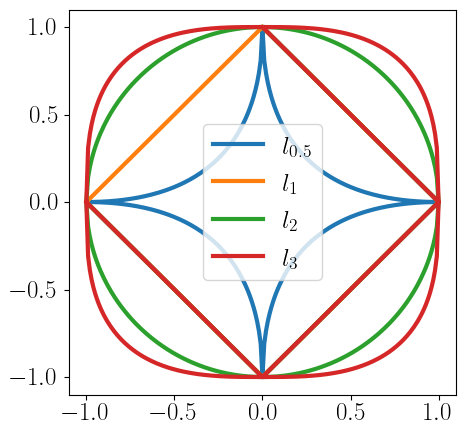

In [16]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.01, 0.01)


plt.figure(figsize=(5, 5))

for p in [0.5, 1, 2, 3]:
    y = np.power((1.0 - np.power(x, p)), 1.0 / p)
    xx = np.concatenate([x, -x, x, -x])
    yy = np.concatenate([y, y, -y, -y])

    plt.plot(xx, yy, label=f'$l_{{{p}}}$')
    
plt.legend()

The visualization above shows the norm of a two dimensional vector.
It shows that for any given two dimensions, two values can form a norm=1.0 only if they sit  on very appropriate distances from the origin.

# 5. Decomposition

Many mathematical objects can be decomposed into their basic building blocks. For example, any integer can be decomposed into a product of prime numbers. For example, number 12 can written as $12 = 2 \times 2 \times 3$, which tells us that this number can only be divided by those numbers and their products. 12 cannot be divided by 5 or 7 or any other number.

Similarly, matrices can be decomposed into its building components. Such breakdown is called **eigendecomposition**, in which you decompose a matrix into a set of eigenvectors and eigenvalues.

## Eigenvector and Eigenvalue

An **eigenvector** of a *square* matrix $\pmb A$ is a nonzero vector $\pmb v$, such that multiplication by $\pmb A$ alters only the scale of $\pmb v$:

$$
{\pmb Av} = \lambda {\pmb v}
$$

In the example above, $\lambda$ is a **eigenvalue** corresponding to the eigenvector $\pmb v$. Note that there is also an equivalent form ${\pmb v}^T{\pmb A} = \lambda {\pmb v}^T$ (also known as a *left eigenvector*).

## Eigendecomposition

We can also generalize the equation above by breaking down a given matrix into a set of eigenvectors.
Suppose that a matrix $\pmb A$ has $n$ linearly independent eigenvectors ${\pmb V} = [{\pmb v}^{(1)}, \dots, {\pmb v}^{(n)}]$ with corresponding eigenvalues ${\pmb \lambda} = \{\lambda_1, \dots, \lambda_n\}$. The decomposition of $\pmb A$ can be written as

$$
{\pmb A} = {\pmb V} \text{diag}({\pmb \lambda}) {\pmb V}^{-1}
$$

For the sake of discussion, we will consider a very specific class of matrices, that have a simpler decomposition. Specifically, we will consider an example where $\pmb V$ is an orthogonal matrix, such that ${\pmb V}^{-1} = {\pmb V}^T$:

$$
{\pmb A} = {\pmb V} {\pmb \Lambda} {\pmb V}^T
$$

In that simplification, matrix $A$ has a very specific meaning. It can be interpreted as "scaling the space by $\lambda_i$ in the direction of vector $v^{(i)}$."

In [43]:
# Create a circle that will be transformed
theta = np.linspace(0, 2*np.pi, 256)
radius = 1.0
lambd = np.array([2.0, 0.5]) * np.sqrt(2)

x0 = radius * np.cos(theta)
x1 = radius * np.sin(theta)
X = np.vstack([x0, x1]).T

# Create some vectors that will be transformed
v1 = np.array([1, 1]) / np.sqrt(2)
v2 = np.array([1, -1]) / np.sqrt(2)
V = np.vstack([v1, v2])  # No need to transpose

# Create transformation matrix A
Lambda = np.diag(lambd)
A = V @ Lambda @ np.linalg.inv(V)  # Decomposition

X_scaled = X @ A
V_scaled = V @ A

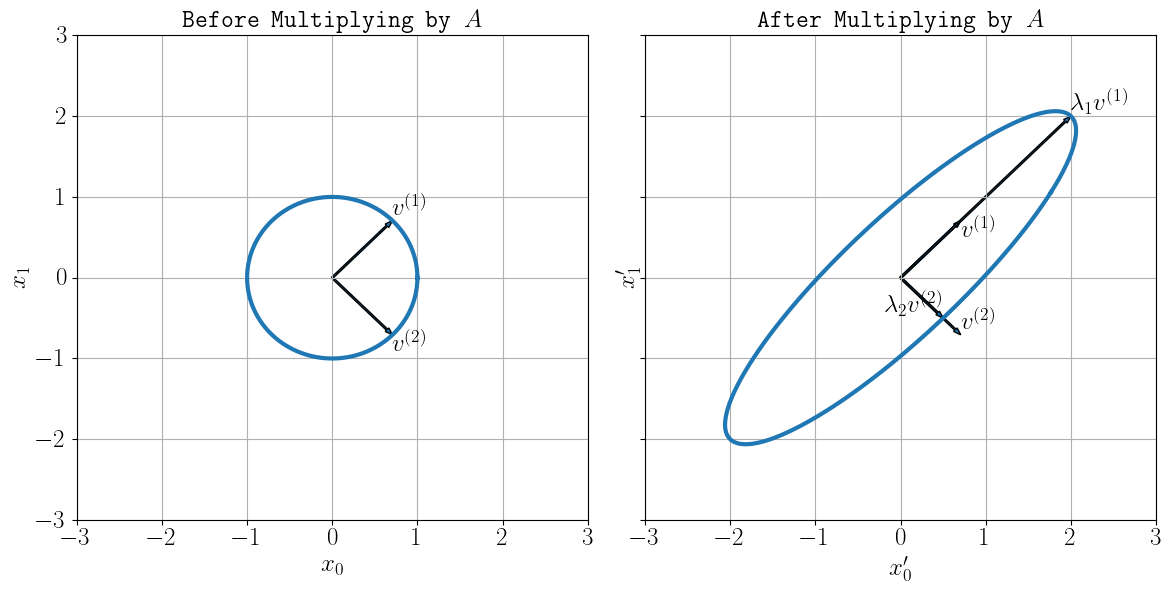

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6.25), sharex=True, sharey=True)
for a in ax:
    a.axis([-3, 3, -3, 3])
    a.grid()
    
## First plot

ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('$x_1$')
ax[1].set_xlabel('$x_0\'$')
ax[1].set_ylabel('$x_1\'$')

ax[0].plot(X[:, 0], X[:, 1])

ax[0].arrow(0, 0, *V[0], width=0.02, length_includes_head=True)
ax[0].text(*V[0], '$v^{(1)}$', ha='left', va='bottom')
ax[0].arrow(0, 0, *V[1], width=0.02, length_includes_head=True)
ax[0].text(*V[1], '$v^{(2)}$', ha='left', va='top')
ax[0].set_title("Before Multiplying by $A$")

## Second plot

ax[1].plot(X_scaled[:, 0], X_scaled[:, 1])

ax[1].arrow(0, 0, *V[0], width=0.02, length_includes_head=True)
ax[1].text(*V[0], '$v^{(1)}$', ha='left', va='top')
ax[1].arrow(0, 0, *V[1], width=0.02, length_includes_head=True)
ax[1].text(*V[1], '$v^{(2)}$', ha='left', va='bottom')

ax[1].arrow(0, 0, *V_scaled[0], width=0.02, length_includes_head=True)
ax[1].text(*V_scaled[0], '$\lambda_1 v^{(1)}$', ha='left', va='bottom')
ax[1].arrow(0, 0, *V_scaled[1], width=0.02, length_includes_head=True)
ax[1].text(*V_scaled[1], '$\lambda_2 v^{(2)}$', ha='right', va='bottom')

ax[1].set_title("After Multiplying by $A$")

plt.tight_layout()

## Singular Value Decomposition (SVD)

Because the eigen value decomposition works for square matrices, we need a tool to generalize it to rectangular matrices. SVD gives pretty much the same information as the eigenvalue decomposition, and has the following form:

$$
A = UDV^T
$$

If $A$ is a $m\times n$ matrix, then $U$ is a $m\times m$ **left-singular matrix**, $D$ is a $m\times n$ diagonal matrix with **singular values**, and $V$ is a $n\times n$ **right-singular matrix**.

$$
\begin{aligned}
U &\leftarrow \text{eigen vectors of } AA^T \\
V &\leftarrow \text{eigen vectors of } A^TA \\
D &\leftarrow \text{square roots of the eigenvalues of } AA^T \text{or } A^TA
\end{aligned}
$$

Notice that if $A$ is a square matrix, the result of the SVD will be equivalent to the eigenvalue decomposition.

Geometrically this can be interpreted as converting a transformation matrix $A$ into several transformation matrices which, if applied consecutively achieve the same result as $A$.

In [70]:
# Create the transformations
U, d, Vt = np.linalg.svd(A)
D = np.diag(d)

In [75]:
# Create the data points
delta = 0.1
points = np.array([(row, col) for row in np.arange(-1.0, 1.0+delta, delta) for col in np.arange(-1.0, 1.0+delta, delta) if (row * row + col * col) <= 1.0])

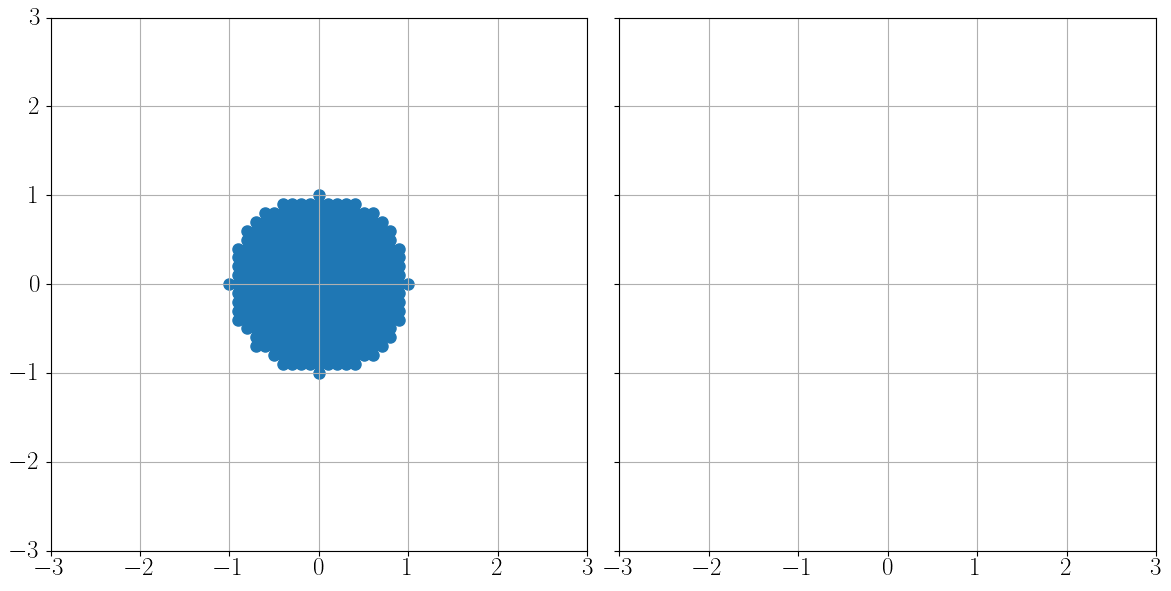

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6.25), sharex=True, sharey=True)
for a in ax:
    a.axis([-3, 3, -3, 3])
    a.grid()
ax[0].scatter(points[:, 0], points[:, 1])


plt.tight_layout()